In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset=pd.read_csv(r'TSLA.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
dataset.shape

(2416, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2408 non-null   float64
 2   High       2404 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2403 non-null   float64
 5   Adj Close  2389 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
dataset.isnull().sum().sum()

60

In [7]:
# to calculate missing values in percentage format
mvp=dataset.isnull().sum()/dataset.shape[0]*100
mvp

Date         0.000000
Open         0.331126
High         0.496689
Low          0.000000
Close        0.538079
Adj Close    1.117550
Volume       0.000000
dtype: float64

In [8]:
# integer & float
df1=dataset.select_dtypes(include=['int64', 'float64'])
df1.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
df1.isnull().sum()

Open          8
High         12
Low           0
Close        13
Adj Close    27
Volume        0
dtype: int64

In [10]:
df1.shape

(2416, 6)

<Axes: >

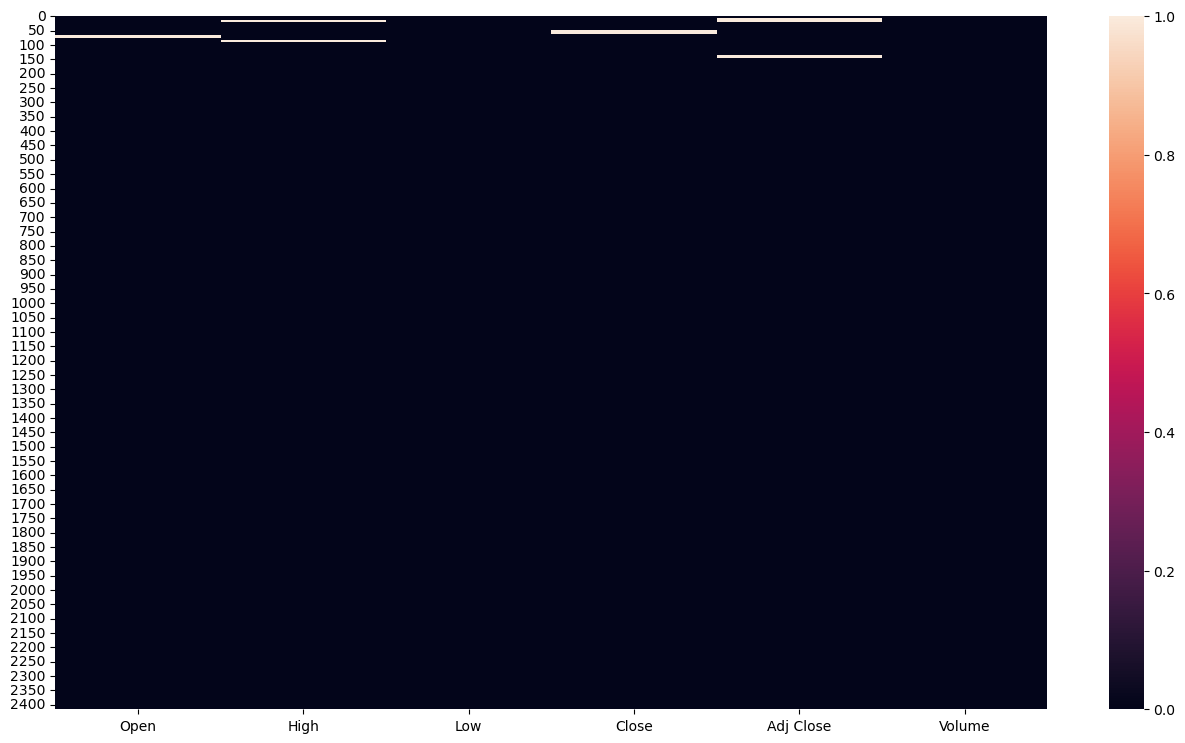

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())

In [12]:
missing_num_var=[var for var in df1.columns if df1[var].isnull().sum()>0]
missing_num_var
# we get variable names that has values missing

['Open', 'High', 'Close', 'Adj Close']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\1727521692.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,kde_kws={'linewidth':5, 'color':'r'})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\1727521692.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=2

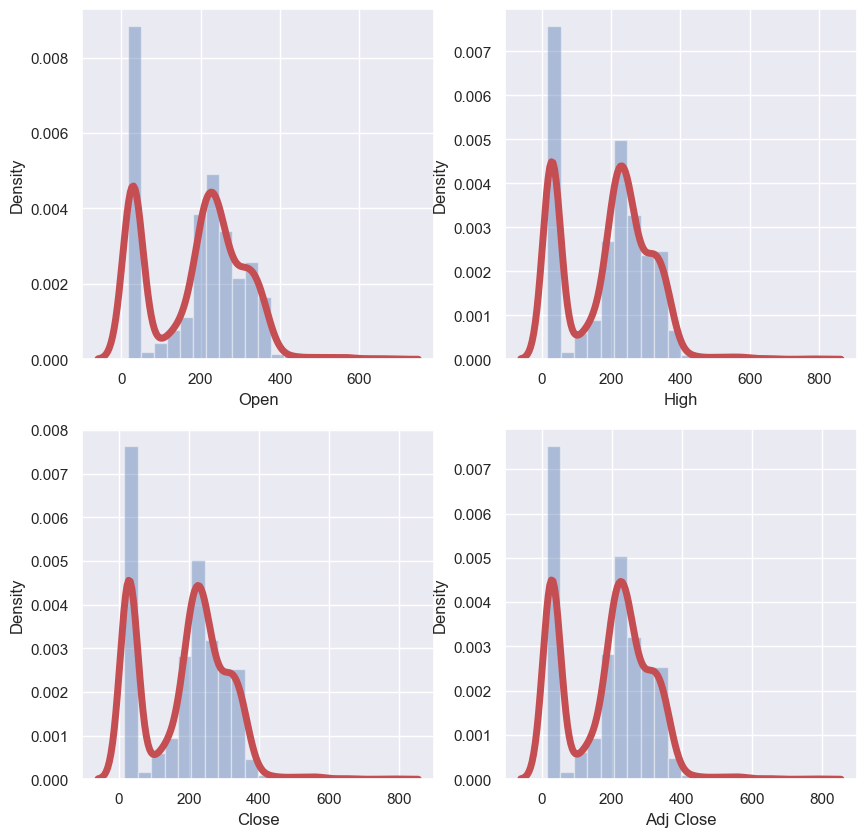

In [13]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
 # the variable that values missing we define as 'missing_num_var'   
    plt.subplot(2,2,i+1)
 # we have 3 missing value variable and we plot it   
    sns.distplot(df1[var], bins=20,kde_kws={'linewidth':5, 'color':'r'})

In [14]:
df1_mean=df1.fillna(df1.mean())
df1_mean.isnull().sum().sum()

0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\151189161.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\151189161.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

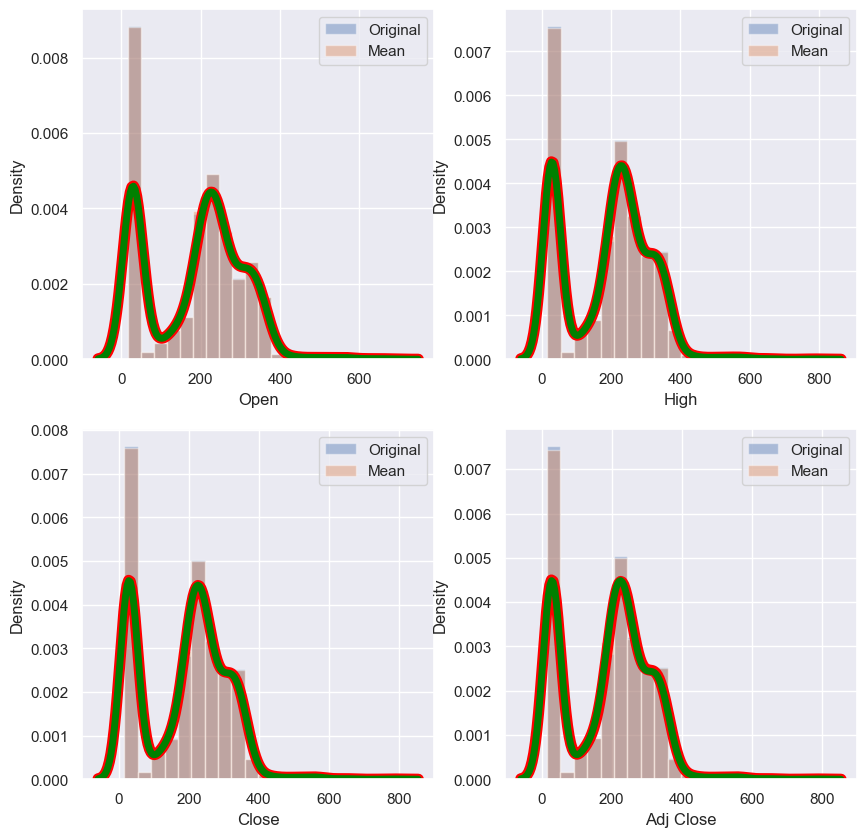

In [15]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df1_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

In [16]:
df1_median=df1.fillna(df1.median())
df1_median.isnull().sum().sum()

0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\1466592004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3888\1466592004.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

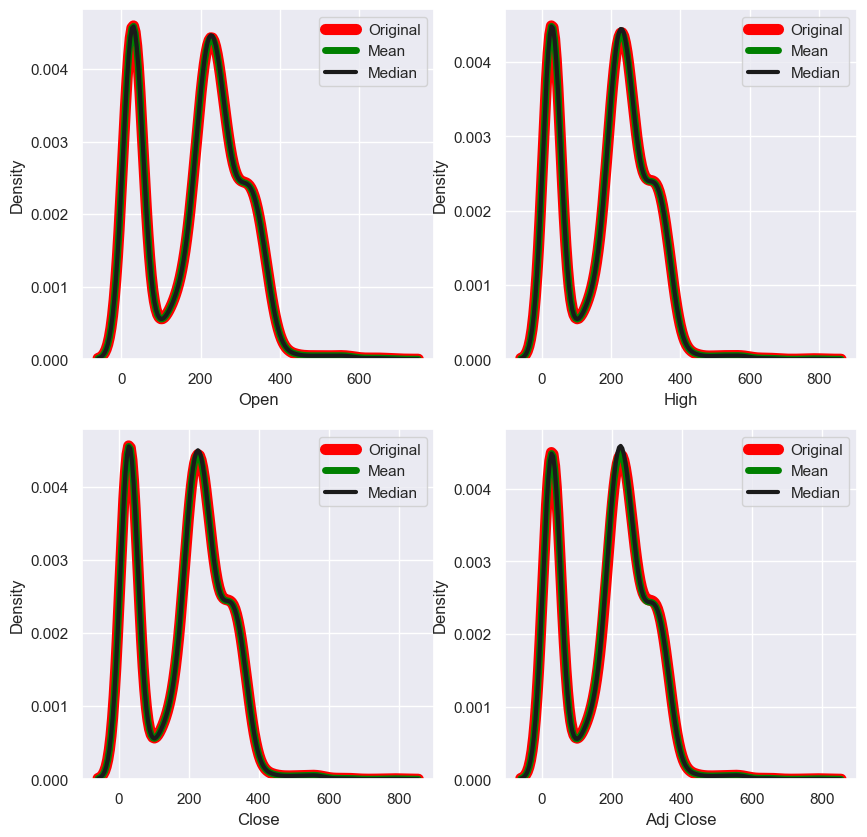

In [17]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df1_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df1_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [18]:
df_concat = pd.concat([df1[missing_num_var],df1_mean[missing_num_var],df1_median[missing_num_var]], axis=1)

In [19]:
df_concat[df_concat.isnull().any(axis=1)]

,Open,High,Close,Adj Close,Open,High,Close,Adj Close,Open,High,Close,Adj Close
6,16.139999,17.520000,17.459999,NaN,16.139999,17.520000,17.459999,188.258799,16.139999,17.520000,17.459999,214.679993
7,17.580000,17.900000,17.400000,NaN,17.580000,17.900000,17.400000,188.258799,17.580000,17.900000,17.400000,214.679993
8,17.950001,18.070000,17.049999,NaN,17.950001,18.070000,17.049999,188.258799,17.950001,18.070000,17.049999,214.679993
9,17.389999,18.639999,18.139999,NaN,17.389999,18.639999,18.139999,188.258799,17.389999,18.639999,18.139999,214.679993
10,17.940001,20.150000,19.840000,NaN,17.940001,20.150000,19.840000,188.258799,17.940001,20.150000,19.840000,214.679993
11,19.940001,21.500000,19.889999,NaN,19.940001,21.500000,19.889999,188.258799,19.940001,21.500000,19.889999,214.679993
12,20.700001,21.299999,20.639999,NaN,20.700001,21.299999,20.639999,188.258799,20.700001,21.299999,20.639999,214.679993
13,21.370001,NaN,21.910000,NaN,21.370001,190.415898,21.910000,188.258799,21.370001,217.375000,21.910000,214.679993
14,21.850000,NaN,20.299999,NaN,21.850000,190.415898,20.299999,188.258799,21.850000,217.375000,20.299999,214.679993
15,20.660000,NaN,20.219999,NaN,20.660000,190.415898,20.219999,188.258799,20.660000,217.375000,20.219999,214.679993


In [20]:
dataset.update(df1_mean)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,188.258799,7711400
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,188.258799,4050600
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,188.258799,2202500
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,188.258799,2680100


In [21]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

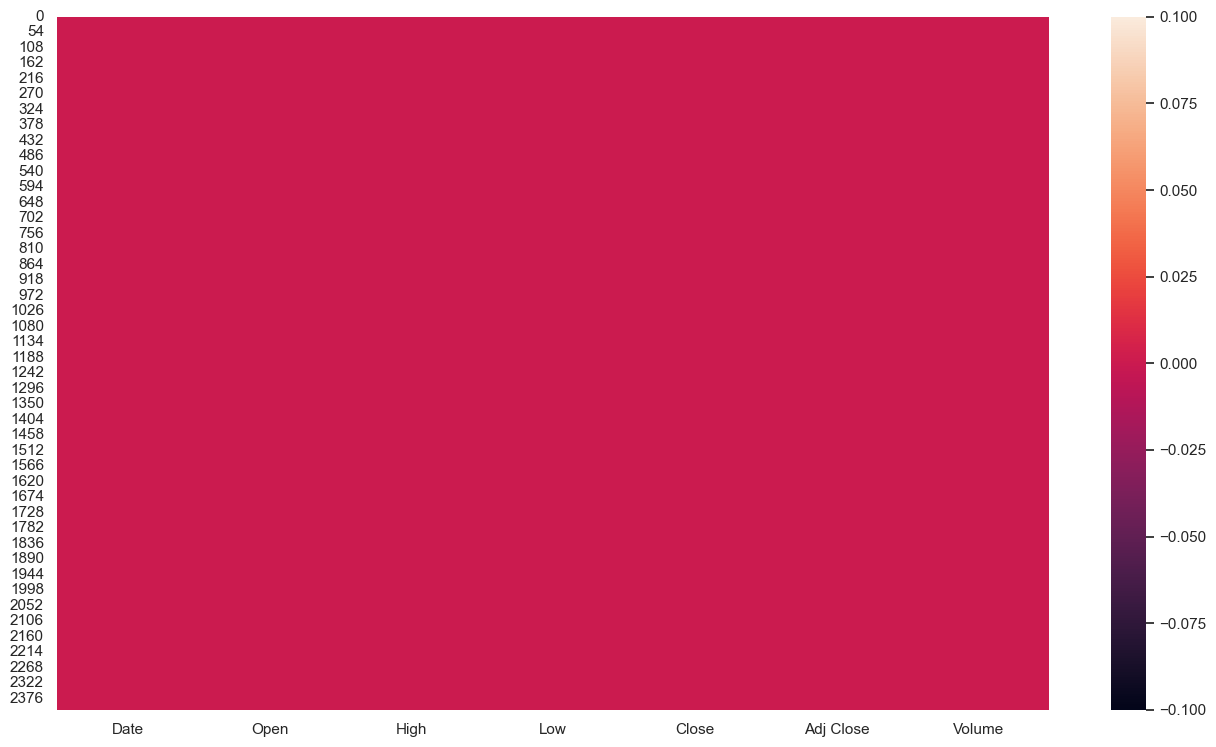

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())

In [23]:
dataset.duplicated().sum()

0

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [25]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.821478,190.415898,182.916639,187.300495,188.258799,5.572722e+06
std,118.355506,120.309277,116.857591,118.510128,117.850073,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.507499,35.207500,33.587501,34.605001,35.094999,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [26]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [27]:
dataset.drop('Adj Close',axis=1,inplace=True)

In [28]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [29]:
print(len(dataset))

2416


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '2/7/2018'),
  Text(0.0, 0, '6/29/2010'),
  Text(500.0, 0, '6/21/2012'),
  Text(1000.0, 0, '6/19/2014'),
  Text(1500.0, 0, '6/14/2016'),
  Text(2000.0, 0, '6/8/2018'),
  Text(2500.0, 0, ''),
  Text(3000.0, 0, '')])

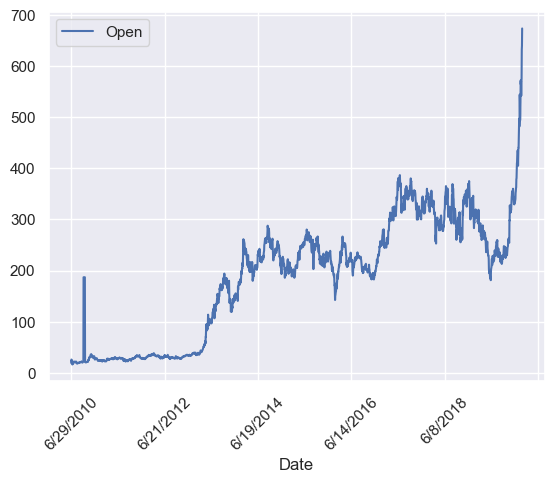

In [30]:
dataset.plot(x='Date',y='Open')
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '2/7/2018'),
  Text(0.0, 0, '6/29/2010'),
  Text(500.0, 0, '6/21/2012'),
  Text(1000.0, 0, '6/19/2014'),
  Text(1500.0, 0, '6/14/2016'),
  Text(2000.0, 0, '6/8/2018'),
  Text(2500.0, 0, ''),
  Text(3000.0, 0, '')])

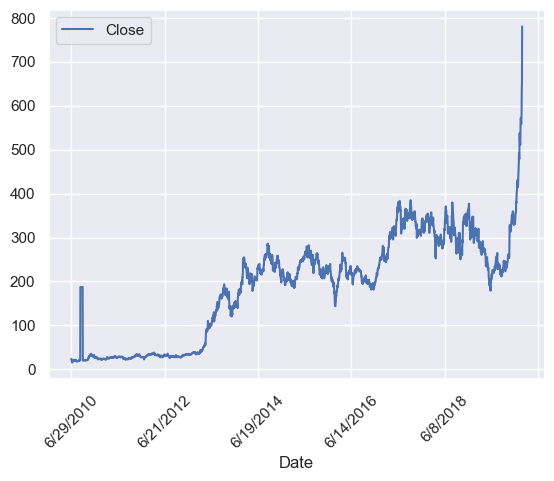

In [31]:
dataset.plot(x='Date',y='Close')
plt.xticks(rotation=45)

In [32]:
X=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [34]:
X_train.shape

(1812, 4)

In [35]:
X_test.shape

(604, 4)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 
regressor=LinearRegression()

In [37]:
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
print(regressor.coef_)

[-4.87387648e-02  4.32116764e-02  1.00574424e+00  2.85541792e-07]


In [39]:
print(regressor.intercept_)

2.7345819357825008


In [40]:
predict=regressor.predict(X_test)

In [41]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
985   210.570007  212.490005  207.720001   3692500
215    27.200001   27.440001   26.170000   1218500
390    28.400000   28.500000   22.639999   5500400
1299  227.929993  228.000000  215.509995   4963000
1806  349.670013  353.470001  347.000000   3412900
1390  220.000000  220.050003  215.979996   3779100
1056  282.989990  285.489990  277.000000   4558800
405    31.100000   31.900000   31.049999    652100
746   103.599998  104.750000  101.199997   7066200
70    186.821478   20.639999   20.340000    141000
2152  344.779999  352.000000  343.500000   4691700
733   113.550003  114.900002   99.000000  25099500
2281  256.709991  260.480011  254.500000   5023100
581    27.670000   28.090000   

In [42]:
predict.shape

(604,)

In [43]:
dframe=pd.DataFrame(y_test,predict)

In [44]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [45]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 
import sklearn.metrics as metrics

In [46]:
regressor.score(X_test,y_test)

0.992570569927677

In [47]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error 3.4539560305855113


In [48]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predict))

Mean Squared Error 103.56007401573831


In [49]:
print('r2_score',metrics.r2_score (y_test,predict))

r2_score 0.992570569927677


In [50]:
graph=dfr.head(20)

<Axes: >

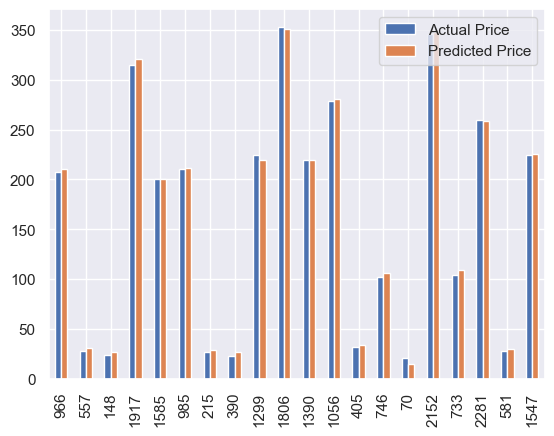

In [51]:
graph.plot(kind='bar')

# Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
regressor=PolynomialFeatures()

In [53]:
regressor.fit(X_train,y_train)

PolynomialFeatures()

In [54]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
985   210.570007  212.490005  207.720001   3692500
215    27.200001   27.440001   26.170000   1218500
390    28.400000   28.500000   22.639999   5500400
1299  227.929993  228.000000  215.509995   4963000
1806  349.670013  353.470001  347.000000   3412900
1390  220.000000  220.050003  215.979996   3779100
1056  282.989990  285.489990  277.000000   4558800
405    31.100000   31.900000   31.049999    652100
746   103.599998  104.750000  101.199997   7066200
70    186.821478   20.639999   20.340000    141000
2152  344.779999  352.000000  343.500000   4691700
733   113.550003  114.900002   99.000000  25099500
2281  256.709991  260.480011  254.500000   5023100
581    27.670000   28.090000   

In [55]:
predict.shape

(604,)

In [56]:
dframe=pd.DataFrame(y_test,predict)

In [57]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [58]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 

In [59]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error 3.4539560305855113


In [60]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predict))

Mean Squared Error 103.56007401573831


In [61]:
print('r2_score',metrics.r2_score (y_test,predict))

r2_score 0.992570569927677


In [62]:
graph=dfr.head(20)

<Axes: >

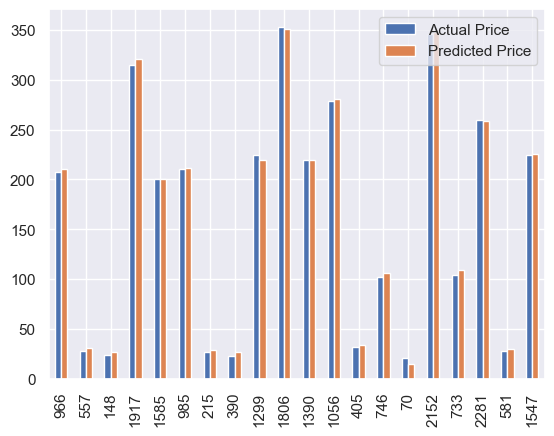

In [63]:
graph.plot(kind='bar')

# Support Vector Machine

In [64]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
regressor=SVR()

In [65]:
regressor.fit(X_train,y_train)

SVR()

In [66]:
predict=regressor.predict(X_test)

In [67]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
985   210.570007  212.490005  207.720001   3692500
215    27.200001   27.440001   26.170000   1218500
390    28.400000   28.500000   22.639999   5500400
1299  227.929993  228.000000  215.509995   4963000
1806  349.670013  353.470001  347.000000   3412900
1390  220.000000  220.050003  215.979996   3779100
1056  282.989990  285.489990  277.000000   4558800
405    31.100000   31.900000   31.049999    652100
746   103.599998  104.750000  101.199997   7066200
70    186.821478   20.639999   20.340000    141000
2152  344.779999  352.000000  343.500000   4691700
733   113.550003  114.900002   99.000000  25099500
2281  256.709991  260.480011  254.500000   5023100
581    27.670000   28.090000   

In [68]:
predict.shape

(604,)

In [69]:
dframe=pd.DataFrame(y_test,predict)

In [70]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [71]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 

In [72]:
regressor.score(X_test,y_test)

0.46707324102715597

In [73]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error 64.94774529981859


In [74]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predict))

Mean Squared Error 7428.555631716026


In [75]:
print('r2_score',metrics.r2_score (y_test,predict))

r2_score 0.46707324102715597


In [76]:
graph=dfr.head(20)

<Axes: >

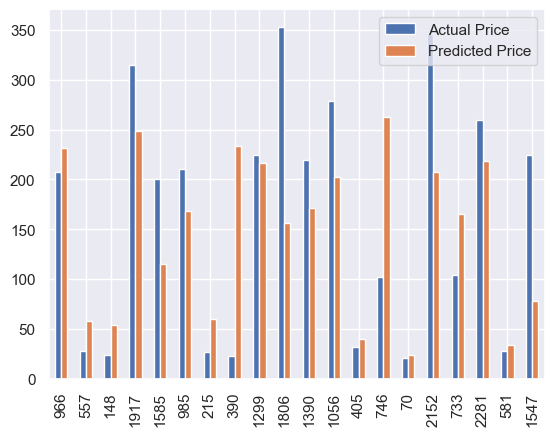

In [77]:
graph.plot(kind='bar')

# Decision tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [79]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [80]:
predict=regressor.predict(X_test)

In [81]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
985   210.570007  212.490005  207.720001   3692500
215    27.200001   27.440001   26.170000   1218500
390    28.400000   28.500000   22.639999   5500400
1299  227.929993  228.000000  215.509995   4963000
1806  349.670013  353.470001  347.000000   3412900
1390  220.000000  220.050003  215.979996   3779100
1056  282.989990  285.489990  277.000000   4558800
405    31.100000   31.900000   31.049999    652100
746   103.599998  104.750000  101.199997   7066200
70    186.821478   20.639999   20.340000    141000
2152  344.779999  352.000000  343.500000   4691700
733   113.550003  114.900002   99.000000  25099500
2281  256.709991  260.480011  254.500000   5023100
581    27.670000   28.090000   

In [82]:
predict.shape

(604,)

In [83]:
dframe=pd.DataFrame(y_test,predict)

In [84]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [85]:
print(dfr)

      Actual Price  Predicted Price
966     207.729996       208.960007
557      28.280001        28.240000
148      24.010000        24.440001
1917    315.230011       347.489990
1585    200.240005       193.880005
985     210.240005       208.289993
215      26.440001        26.760000
390      22.790001        25.549999
1299    224.839996       216.220001
1806    353.179993       350.510010
1390    219.039993       216.779999
1056    278.480011       280.690002
405      31.799999        32.070000
746     102.199997       105.720001
70       20.430000        20.600000
2152    346.049988       347.089996
733     104.629997       117.180000
2281    260.170013       255.729996
581      28.059999        27.799999
1547    225.000000       223.509995
2124    359.700012       370.000000
1773    327.779999       327.170013
1330    220.690002       222.149994
1898    337.950012       338.730011
2032    308.739990       304.700012
1607    181.449997       181.410004
2374    336.200012       333

In [86]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score 

In [87]:
regressor.score(X_test,y_test)

0.9820034344311999

In [88]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error 3.8696404895281287


In [89]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predict))

Mean Squared Error 250.85715111270846


In [90]:
print('r2_score',metrics.r2_score (y_test,predict))

r2_score 0.9820034344311999


In [91]:
graph=dfr.head(20)

<Axes: >

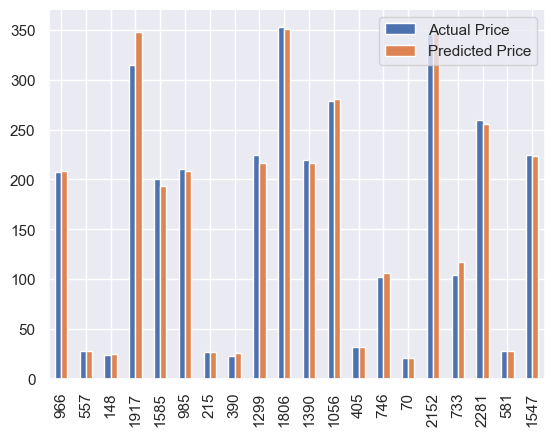

In [92]:
graph.plot(kind='bar')

# Implementing Ridge and Lasso Regression

In [93]:
from sklearn.linear_model import Ridge,Lasso

In [94]:
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.9925705680464706

In [95]:
ls=Lasso()
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

0.9925636782833316

In [96]:
ls=Lasso()
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

0.9925636782833316

In [97]:
rd2=Ridge(alpha=2)
rd2.fit(X_train,y_train)
rd2.score(X_test,y_test)

0.9925705661645634

In [98]:
ls2=Lasso(alpha=2)
ls2.fit(X_train,y_train)
ls2.score(X_test,y_test)

0.9925502904317827

In [99]:
ls3=Lasso(alpha=3)
ls3.fit(X_train,y_train)
ls3.score(X_test,y_test)

0.992543590611423

# Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [101]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
predict=regressor.predict(X_test)

In [103]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
985   210.570007  212.490005  207.720001   3692500
215    27.200001   27.440001   26.170000   1218500
390    28.400000   28.500000   22.639999   5500400
1299  227.929993  228.000000  215.509995   4963000
1806  349.670013  353.470001  347.000000   3412900
1390  220.000000  220.050003  215.979996   3779100
1056  282.989990  285.489990  277.000000   4558800
405    31.100000   31.900000   31.049999    652100
746   103.599998  104.750000  101.199997   7066200
70    186.821478   20.639999   20.340000    141000
2152  344.779999  352.000000  343.500000   4691700
733   113.550003  114.900002   99.000000  25099500
2281  256.709991  260.480011  254.500000   5023100
581    27.670000   28.090000   

In [104]:
predict.shape

(604,)

In [105]:
dframe=pd.DataFrame(y_test,predict)

In [106]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [107]:
print(dfr)

      Actual Price  Predicted Price
966     207.729996       210.153202
557      28.280001        28.358900
148      24.010000        24.320700
1917    315.230011       338.472903
1585    200.240005       197.907201
985     210.240005       209.947900
215      26.440001        26.757000
390      22.790001        25.407700
1299    224.839996       220.870900
1806    353.179993       350.479399
1390    219.039993       217.816101
1056    278.480011       282.844602
405      31.799999        31.512100
746     102.199997       103.743801
70       20.430000        20.448300
2152    346.049988       346.514205
733     104.629997       111.266101
2281    260.170013       257.395501
581      28.059999        27.824000
1547    225.000000       223.313397
2124    359.700012       357.532800
1773    327.779999       326.269409
1330    220.690002       220.978199
1898    337.950012       339.890003
2032    308.739990       302.214495
1607    181.449997       181.578901
2374    336.200012       335

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error, mean_squared_error, r2_score 

In [109]:
regressor.score(X_test,y_test)

0.989735109403094

In [110]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error 3.310721425918444


In [111]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predict))

Mean Squared Error 143.08403466090718


In [112]:
print('r2_score',metrics.r2_score (y_test,predict))

r2_score 0.989735109403094


In [113]:
graph=dfr.head(20)

<Axes: >

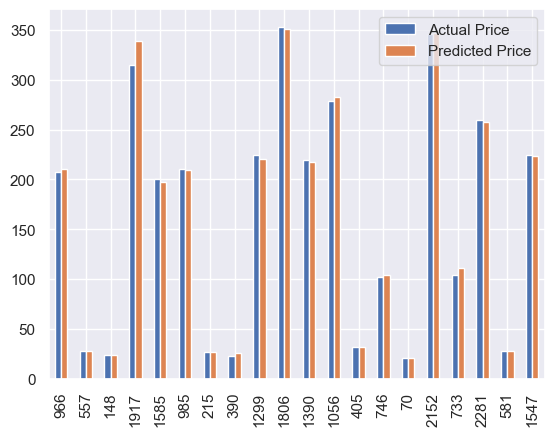

In [114]:
graph.plot(kind='bar')